In [1]:
import keras
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train[np.where(Y_train==1)[0],:,:,:]
x_test = X_test[np.where(Y_test==1)[0],:,:,:]
y_train = Y_train[np.where(Y_train==1)[0]]
y_test = Y_test[np.where(Y_test==1)[0]]
print('[Total ] X_train:{}    Y_train:{}    X_test:{}    Y_test:{}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))
print('[Label1] x_train:{}     y_train:{}    x_test:{}     y_test:{}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

[Total ] X_train:(50000, 32, 32, 3)    Y_train:(50000, 1)    X_test:(10000, 32, 32, 3)    Y_test:(10000, 1)
[Label1] x_train:(5000, 32, 32, 3)     y_train:(5000, 1)    x_test:(1000, 32, 32, 3)     y_test:(1000, 1)


In [3]:
print('x_train[0][0][0] >>> Data:{}    dtype:{}'.format(x_train[0][0][0], x_train[0][0][0].dtype))
x_train_s = x_train.astype('float32')/255
x_test_s  = x_test.astype('float32')/255.
print('x_train_s[0][0][0] >>> Data:{}    dtype:{}'.format(x_train_s[0][0][0], x_train_s[0][0][0].dtype))

x_train[0][0][0] >>> Data:[170 180 198]    dtype:uint8
x_train_s[0][0][0] >>> Data:[0.6666667 0.7058824 0.7764706]    dtype:float32


In [4]:
# 가우시간 노이즈 추가
x_train_n = x_train_s + 0.2 * np.random.normal(loc=0.0, scale=0.4, size=x_train_s.shape)
x_test_n = x_test_s + 0.2 * np.random.normal(loc=0.0, scale=0.4, size=x_test_s.shape)
x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

In [5]:
inp_img = Input(shape=(32,32,3))

In [6]:
img = Conv2D(32, (3,3), activation='relu', padding='same')(inp_img)
img = MaxPooling2D((2,2), padding='same')(img)
img = Conv2D(32, (3,3), activation='relu', padding='same')(img)
img = UpSampling2D((2,2))(img)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(img)

In [7]:
autoencoder = Model(inp_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
tensorboard = TensorBoard(log_dir='./models/autoencoder1',\
              histogram_freq=0, write_graph=True, write_images=True)
model_saver = ModelCheckpoint(
                    filepath='./models/autoencoder1/autoencoder_model',\
                     verbose=0, period=2)

In [10]:
autoencoder.fit(x_train_n, x_train_s, epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_n, x_test_s),
                callbacks=[tensorboard, model_saver])

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.6237 - val_loss: 0.5858
Epoch 2/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5663 - val_loss: 0.5579
Epoch 3/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5568 - val_loss: 0.5510
Epoch 4/10
5000/5000 [==============================] - 28s 6ms/step - loss: 0.5522 - val_loss: 0.5618
Epoch 5/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5483 - val_loss: 0.5419
Epoch 6/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5453 - val_loss: 0.5425
Epoch 7/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5439 - val_loss: 0.5394
Epoch 8/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.5417 - val_loss: 0.5404
Epoch 9/10
5000/5000 [==============================] - 24s 5ms/step - loss: 0.5404 - val_loss: 0.5361
Epoch 10/10
5000/5000 [==

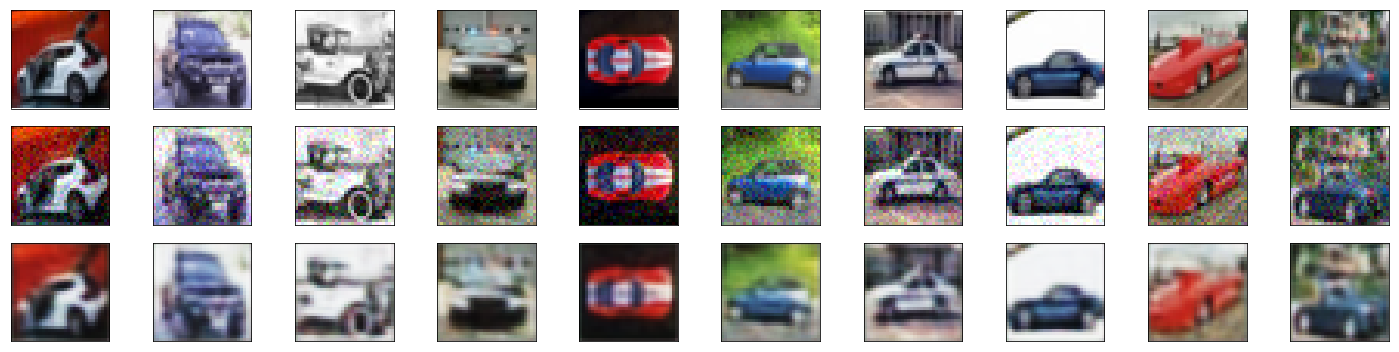

In [11]:
import matplotlib.pyplot as plt
% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(3,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_s[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
    ax = axarr[2,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()